In [1]:
from utils import run_sim_collect_all_data, construct, plot_sim, sweep_with_testing, sample_action, get_observation, plot_testing, plot_b_matrices
import pymdp 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap
cmap0 = LinearSegmentedColormap.from_list("", ["white", "black"])
import seaborn as sns

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

observation_CC = [0]
observation_CD = [1]
observation_DC = [2]
observation_DD = [3]
BC = np.array([[0.5,0.5,0.5,0.5],[0.5,0.5,0.5,0.5],[0,0,0,0],[0,0,0,0]])
BD = np.array([[0,0,0,0],[0,0,0,0],[0.5,0.5,0.5,0.5],[0.5,0.5,0.5,0.5]])
sD=np.array([0,0,0,1])
sC = np.array([1,0,0,0])


In [2]:

def single_agent_run(observation, agent):
    agent.D = np.array([0.25,0.25,0.25,0.25])
    qs = agent.infer_states(observation)

    qp, efe = agent.infer_policies()

    action = sample_action(agent)
    agent.action = action

    return action, qs, qp

Determinsitic agents with the same learning rate - Data from real simulation

In [3]:

def run_pavlov_agent(lr = 0.3, T = 2000, beta =1):
    """ This code collects data for a dual agent run where both agents are determinnistic and have the same learning rate
    The resulting agent will have learned the Pavlov strategy"""

    agent_pavlov, agent_2, D = construct(lr_pB = lr, lr_pB_2=lr, beta=beta, factors_to_learn="all")
    #training
    actions_over_time, B1_over_time, qpB_over_time, q_pi_over_time, q_s_over_time, agent, efe_over_time  = run_sim_collect_all_data(agent_pavlov, agent_2, observation_1 = [1], observation_2 = [1],D=D,T=T)
    return actions_over_time, B1_over_time, qpB_over_time, q_pi_over_time, q_s_over_time, agent

In [4]:
agent_pavlov, agent_2, D = construct(lr_pB = 0.1, lr_pB_2=0.1, factors_to_learn="all")
#training
actions_over_time, B1_over_time, qpB_over_time, q_pi_over_time, q_s_over_time, agent, efe_over_time = run_sim_collect_all_data(agent_pavlov, agent_2, observation_1 = [1], observation_2 = [1],D=D,T=2000)


/var/folders/6q/6kkn1hmd2wd1528g80csnfw00000gr/T/ipykernel_88832/3422777161.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(np.linspace(-1,T-1,8).astype(int)+1,fontsize = 15)


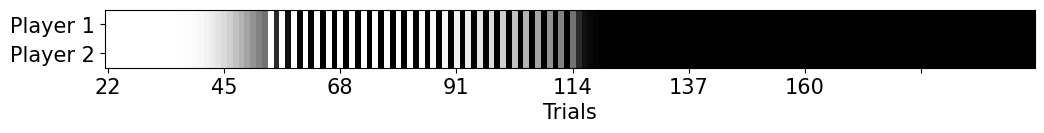

In [9]:
T = 160
fig2, ax2 = plt.subplots(figsize = (12,15))
ax2.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
im = ax2.imshow(q_pi_over_time[:T,0,:].T,cmap =cmap0, aspect = 5, vmin=0, vmax =1, interpolation="None")
ax2.set_xlabel("Trials",fontsize = 15)
#ax2.set_xticks(np.linspace(0,T-1,8).astype(int) ,fontsize = 5)
ax2.set_xticklabels(np.linspace(-1,T-1,8).astype(int)+1,fontsize = 15)
ax2.set_yticks([0, 1], labels=["Player 1", "Player 2"],fontsize = 15)


In [10]:

B1_over_time1 = []
B1_over_time2 = []
B1_over_time3 = []
B1_over_time4 = []

for lr in np.linspace(0.01,1,6):
    agent_pavlov, agent_2, D = construct(lr_pB = lr, lr_pB_2=lr, factors_to_learn="all")

    actions_over_time, B1_over_time, qpB_over_time, q_pi_over_time, q_s_over_time, agent, efe_over_time = run_sim_collect_all_data(agent_pavlov, agent_2, observation_1 = [1], observation_2 = [1],D=D,T=1000)
    B1_over_time1.append(B1_over_time[:50,2,-1,-1,0])


    
    B1_over_time2.append(B1_over_time[:50,1,-1,0,0])
    B1_over_time3.append(B1_over_time[:50,0,0,0,0])
    B1_over_time4.append(B1_over_time[:50,-1,0,-1,0])

In [11]:

x1 = []
x2 = []


for lr in [0.1,0.2,1.0]:
    agent_pavlov, agent_2, D = construct(lr_pB = lr, lr_pB_2=lr, factors_to_learn="all")

    actions_over_time, B1_over_time, qpB_over_time, q_pi_over_time, q_s_over_time, agent, efe_over_time = run_sim_collect_all_data(agent_pavlov, agent_2, observation_1 = [1], observation_2 = [1],D=D,T=1000)
    x1.append((B1_over_time[:150,2,:,1,0] * q_s_over_time[:150,:,0]).sum(axis=1))    
    x2.append((B1_over_time[:150,0,:,0,0] * q_s_over_time[:150,:,0]).sum(axis=1))


Text(0.5, 1.0, 'Marginalised transition probabilities to DC and CC over trials')

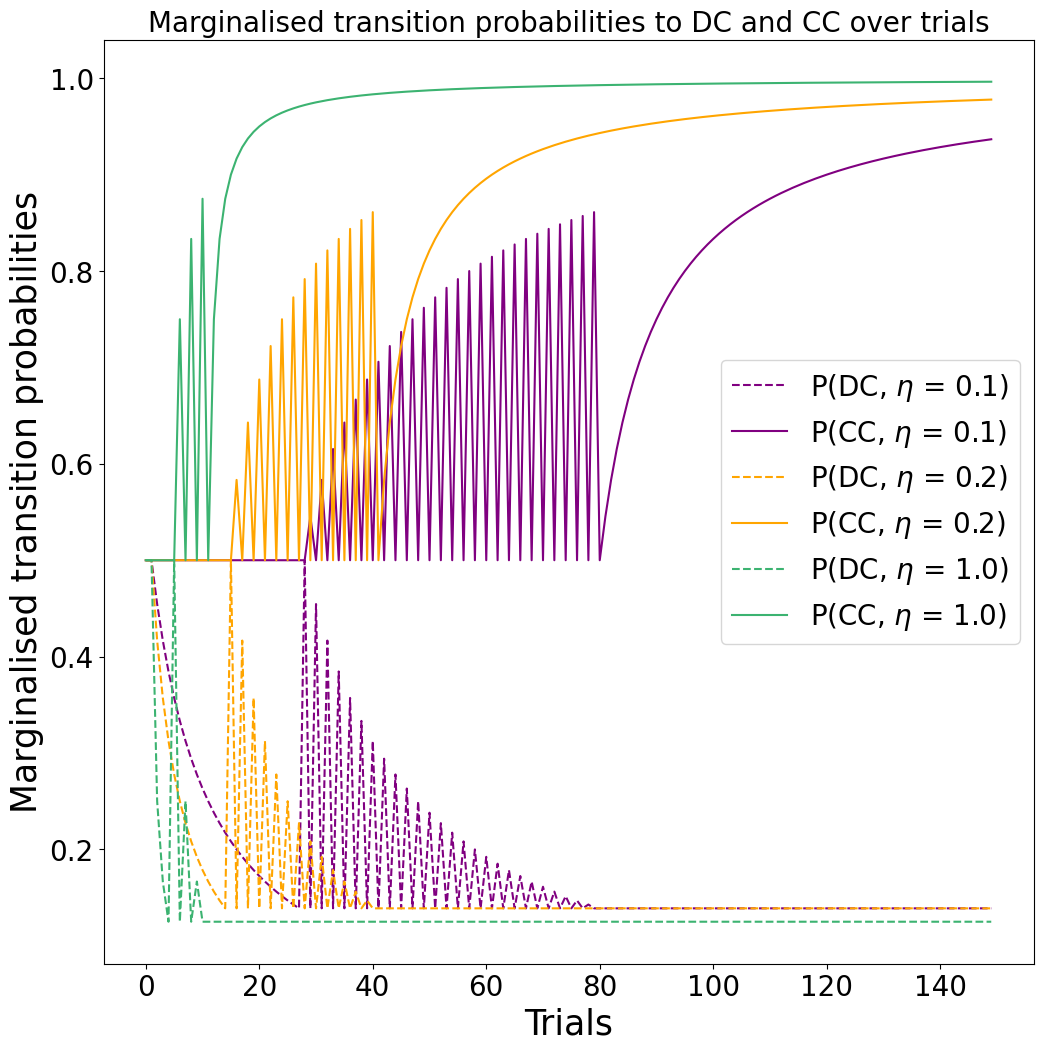

In [12]:
#plt.plot(B1_over_time[:50,2,0,1,0])
#plt.plot(B1_over_time[:50,2,1,1,0])
#plt.plot(B1_over_time[:50,2,2,1,0])
figure = plt.figure(figsize = (12,12))
colors = ['purple','orange','mediumseagreen']
#plt.plot(B1_over_time[:50,2,3,1,0])
for i in [0,1,2]:

    sns.lineplot(x1[i], label = r"P(DC, $\eta$ = "  + str([0.1,0.2,1.0][i]) + ")", color=colors[i], linestyle = "--")
    sns.lineplot(x2[i], label = r"P(CC, $\eta$ = "  + str([0.1,0.2,1.0][i]) + ")", color = colors[i])
plt.legend(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel("Trials",fontsize=25)
plt.ylabel("Marginalised transition probabilities", fontsize=25)
plt.title("Marginalised transition probabilities to DC and CC over trials",fontsize=20)

<Figure size 640x480 with 0 Axes>

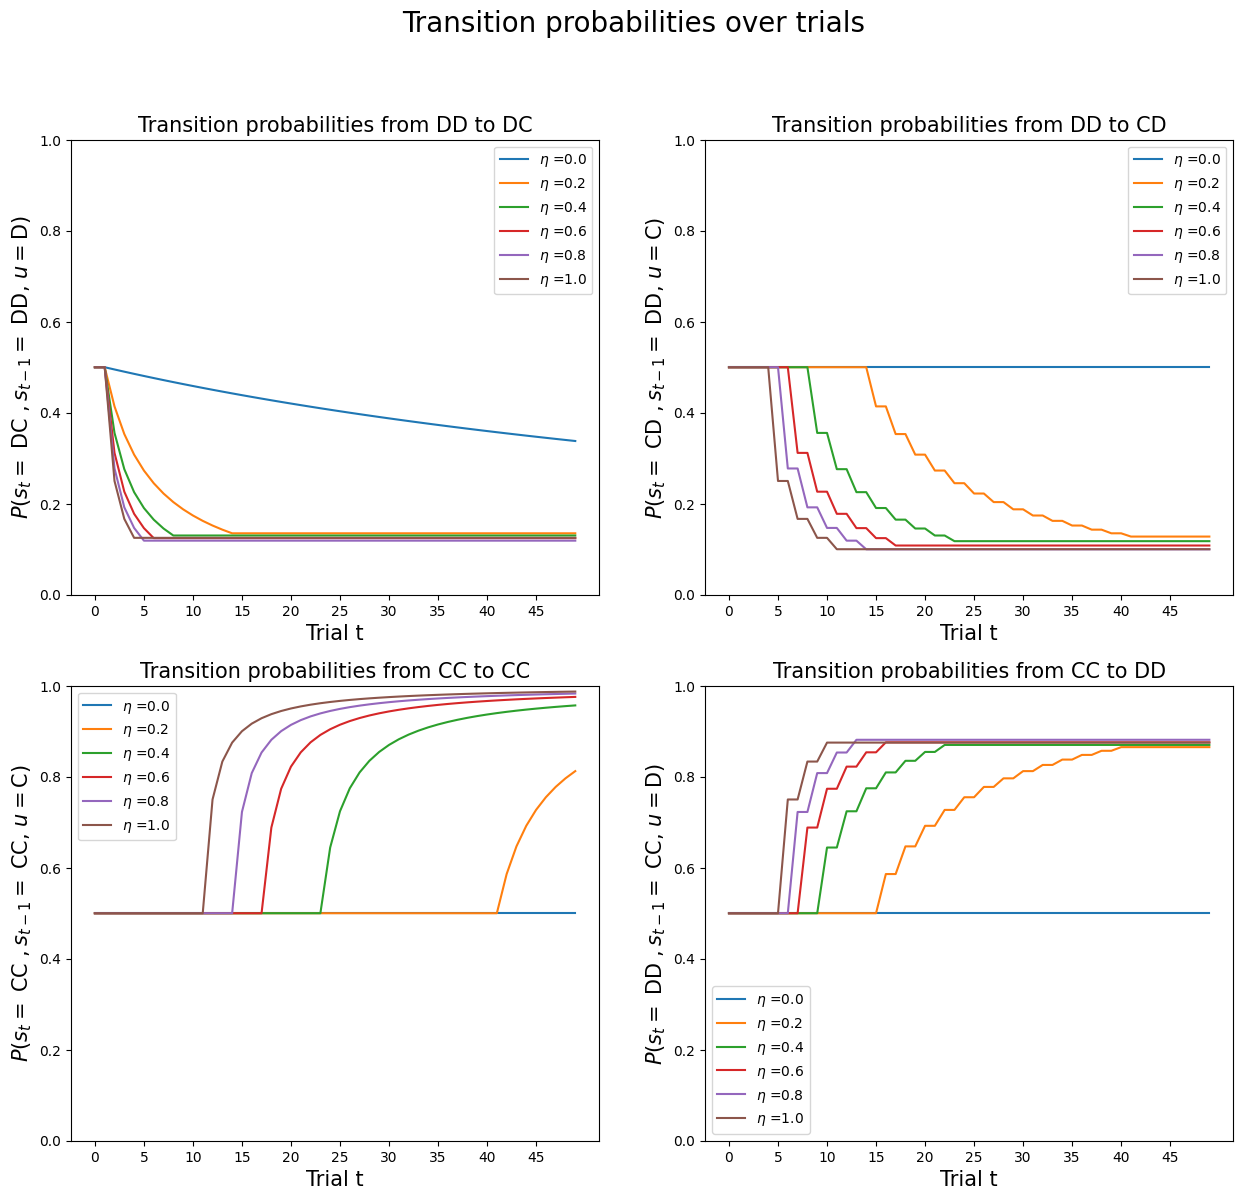

In [13]:
import seaborn as sns 
plt.clf()
fig, axes = plt.subplots(2, 2, figsize=(15,13))
axes[0,0].set_ylabel(r"$P(s_{t} = $ DC $, s_{t-1} =$ DD, $u = $D)", fontsize = 15)
axes[0,0].set_xlabel("Trial t", fontsize = 15)
axes[0,0].set_xticks(np.arange(0,50,5), labels = np.arange(0,50,5))
axes[0,0].set_title("Transition probabilities from DD to DC", fontsize = 15)
axes[0,1].set_ylabel(r"$P(s_{t} = $ CD $, s_{t-1} =$ DD, $u=$C)", fontsize = 15)
axes[0,1].set_xlabel("Trial t", fontsize = 15)
axes[0,1].set_xticks(np.arange(0,50,5), labels = np.arange(0,50,5))
axes[0,1].set_title("Transition probabilities from DD to CD", fontsize = 15)
axes[1,0].set_ylabel(r"$P(s_{t} = $ CC $, s_{t-1} =$ CC, $u=$C)", fontsize = 15)
axes[1,0].set_xlabel("Trial t", fontsize = 15)
axes[1,0].set_xticks(np.arange(0,50,5), labels = np.arange(0,50,5))
axes[1,0].set_title("Transition probabilities from CC to CC", fontsize = 15)
axes[1,1].set_ylabel(r"$P(s_{t} = $ DD $, s_{t-1} =$ CC, $u=$D)", fontsize = 15)
axes[1,1].set_xlabel("Trial t", fontsize = 15)
axes[1,1].set_xticks(np.arange(0,50,5), labels = np.arange(0,50,5))
axes[1,1].set_title("Transition probabilities from CC to DD", fontsize = 15)

axes[0,0].set_ylim(0,1) #TODO
axes[0,1].set_ylim(0,1) #TODO
axes[1,0].set_ylim(0,1) #TODO
axes[1,1].set_ylim(0,1) #TODO
for i in range(len(B1_over_time1)):
    sns.lineplot(ax = axes[0,0], x = list(range(50)), y=  B1_over_time1[i], label =  r"$\eta$ ="  + str(np.linspace(0,1,6)[i].round(1)))

    sns.lineplot(ax = axes[0,1], x = list(range(50)), y=  B1_over_time2[i], label =   r"$\eta$ ="  + str(np.linspace(0,1,6)[i].round(1)))

    sns.lineplot(ax = axes[1,0], x = list(range(50)), y=  B1_over_time3[i], label =   r"$\eta$ ="  + str(np.linspace(0,1,6)[i].round(1)))

    sns.lineplot(ax = axes[1,1], x = list(range(50)), y=  B1_over_time4[i], label =  r"$\eta$ ="  + str(np.linspace(0,1,6)[i].round(1)))

axes[0,0].legend()
axes[0,1].legend()

axes[1,0].legend()

axes[1,1].legend()

plt.suptitle('Transition probabilities over trials', fontsize = 20)
plt.savefig('Figure 1')

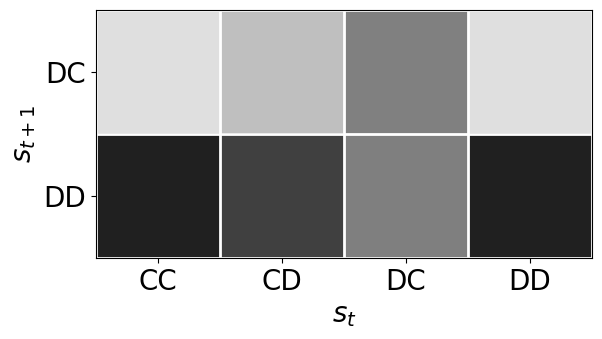

In [14]:
plt.imshow(B1_over_time[150,2:,:,1,0], cmap = cmap0, vmin = 0, vmax =1)
ax = plt.gca()
ax.set_xticks(np.arange(0,4,1))
ax.set_yticks(np.arange(0,2,1))
ax.set_xticks(np.arange(-0.5,4,1), minor=True)
ax.set_yticks(np.arange(-0.5,2,1), minor=True)

ax.set_xticklabels(['CC','CD','DC','DD'],fontsize =20)
ax.set_yticklabels(['DC','DD'],fontsize =20)
ax.set_xlabel(r'$s_t$',fontsize =20)
ax.set_ylabel(r'$s_{t+1}$',fontsize =20)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
ax.tick_params(which='minor', bottom=False, left=False)



In [15]:
both_agents = qpB_over_time[:100,:,:,0]

In [16]:
qBC_C = [both_agents[i][0,0,0] for i in range(100)]
qBD_D = [both_agents[i][-1,-1,1] for i in range(100)]
qBC_D = [both_agents[i][3,0,1] for i in range(100)]
qBD_C = [both_agents[i][0,3,0] for i in range(100)]

Text(0.5, 1.0, 'Probability of cooperation per agent')

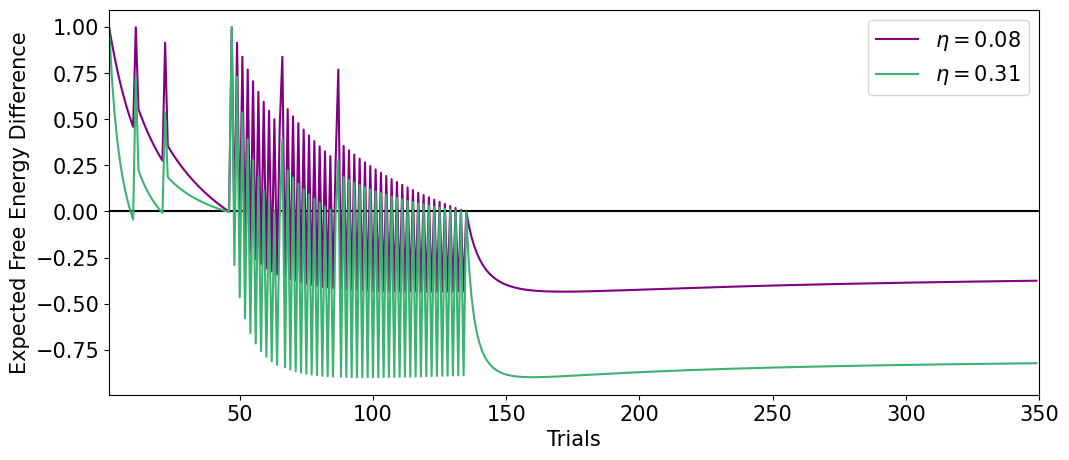

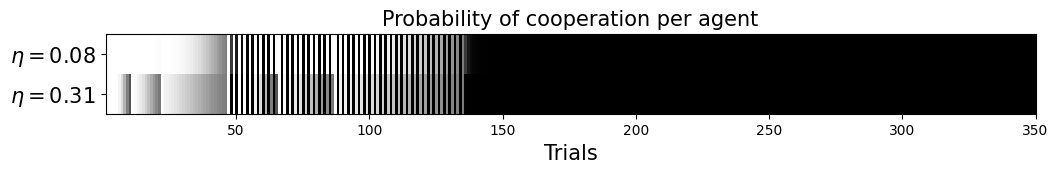

In [18]:
agent_pavlov, agent_2, D = construct(lr_pB = 0.08747474747474746, lr_pB_2=0.3139393939393939, factors_to_learn="all")
#training
actions_over_time2, B1_over_time2, qpB_over_time2, q_pi_over_time2, q_s_over_time2, agent2, efe_over_time2 = run_sim_collect_all_data(agent_pavlov, agent_2, observation_1 = [1], observation_2 = [1],D=D,T=5000)



fig = plt.figure(figsize=(12,5))
import matplotlib.gridspec as gridspec
T = 350


sns.lineplot([(-1*e[0]+e[1]) for e in efe_over_time2[:T,:,0]], label = r"$\eta = 0.08$", color = 'purple')
sns.lineplot([(-1*e[0]+e[1]) for e in efe_over_time2[:T,:,1]], label = r"$\eta = 0.31$", color = 'mediumseagreen')
plt.legend(fontsize=15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.xlim(1,T)
plt.hlines(0,0,350, color = 'black',zorder = 0)


plt.ylabel('Expected Free Energy Difference',fontsize=15)
plt.xlabel('Trials', fontsize = 15)


fig2, ax2 = plt.subplots(figsize = (12,15))
ax2.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
im = ax2.imshow(q_pi_over_time2[:,1].T,cmap ='gray', aspect = 15, vmin=0, vmax =1, interpolation="None")
ax2.set_xlabel("Trials",fontsize = 15)
#ax2.set_xticks(np.linspace(0,T-1,8).astype(int) ,fontsize = 5)
#ax2.set_xticklabels(np.linspace(-1,T-1,8).astype(int)+1,fontsize = 15)
ax2.set_yticks([0, 1], labels=[r"$\eta = 0.08$", r"$\eta = 0.31$"],fontsize = 15)
ax2.set_xlim(1,T)

plt.title("Probability of cooperation per agent",fontsize = 15)


Text(0.5, 1.0, 'Probability of cooperation per agent')

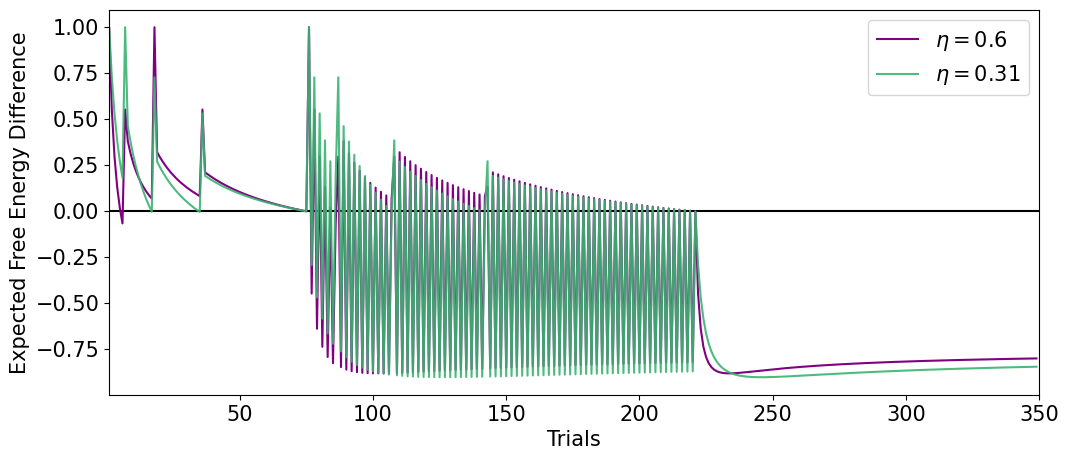

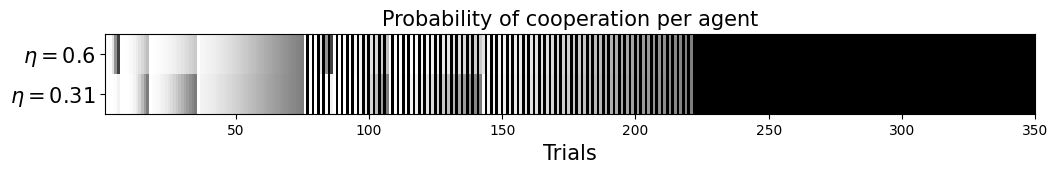

In [19]:
agent_pavlov, agent_2, D = construct(lr_pB = 0.6, lr_pB_2=0.31989898989898985, factors_to_learn="all")
#training
actions_over_time2, B1_over_time2, qpB_over_time2, q_pi_over_time2, q_s_over_time2, agent2, efe_over_time2 = run_sim_collect_all_data(agent_pavlov, agent_2, observation_1 = [1], observation_2 = [1],D=D,T=1000)




fig = plt.figure(figsize=(12,5))
import matplotlib.gridspec as gridspec
T = 350


sns.lineplot([(-1*e[0]+e[1]) for e in efe_over_time2[:T,:,0]], label = r"$\eta = 0.6$", color = 'purple')
sns.lineplot([(-1*e[0]+e[1]) for e in efe_over_time2[:T,:,1]], label = r"$\eta = 0.31$", color = 'mediumseagreen', alpha = 0.9)
plt.legend(fontsize=15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.xlim(1,T)
plt.hlines(0,0,350, color = 'black',zorder = 0)


plt.ylabel('Expected Free Energy Difference',fontsize=15)
plt.xlabel('Trials', fontsize = 15)


fig2, ax2 = plt.subplots(figsize = (12,15))
ax2.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
im = ax2.imshow(q_pi_over_time2[:,1].T,cmap ='gray', aspect = 15, vmin=0, vmax =1, interpolation="None")
ax2.set_xlabel("Trials",fontsize = 15)
#ax2.set_xticks(np.linspace(0,T-1,8).astype(int) ,fontsize = 5)
#ax2.set_xticklabels(np.linspace(-1,T-1,8).astype(int)+1,fontsize = 15)
ax2.set_yticks([0, 1], labels=[r"$\eta = 0.6$", r"$\eta = 0.31$"],fontsize = 15)
ax2.set_xlim(1,T)

plt.title("Probability of cooperation per agent",fontsize = 15)


[]

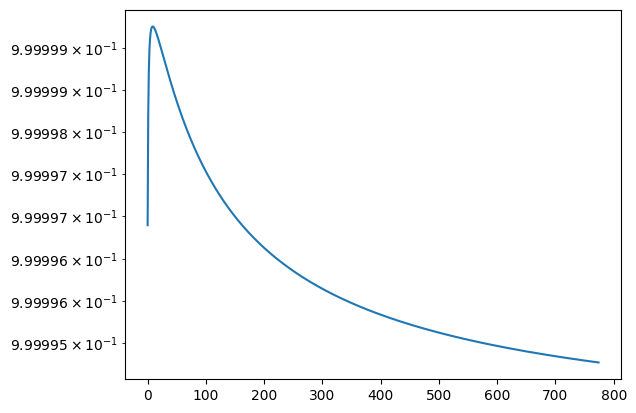

In [20]:
plt.plot(q_pi_over_time2[225:,0,0])
plt.semilogy()

Text(0.5, 1.0, 'Probability of cooperation per agent')

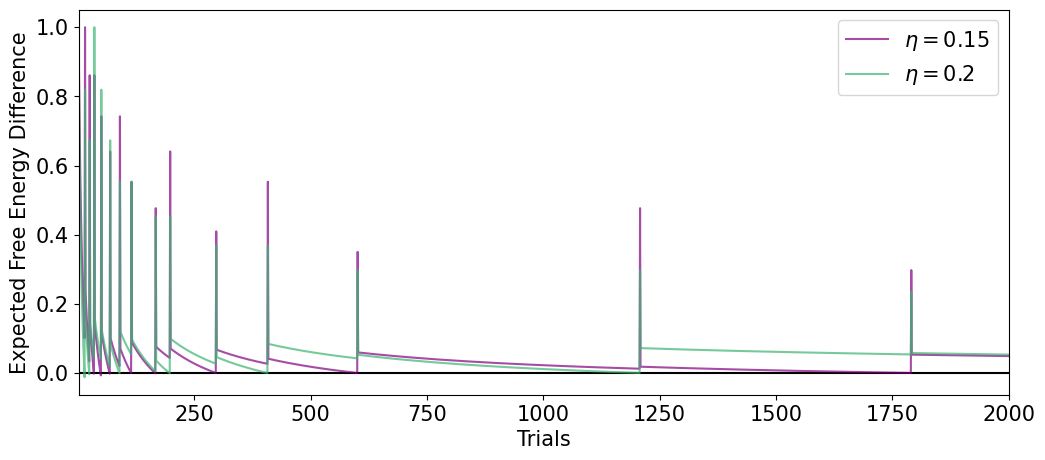

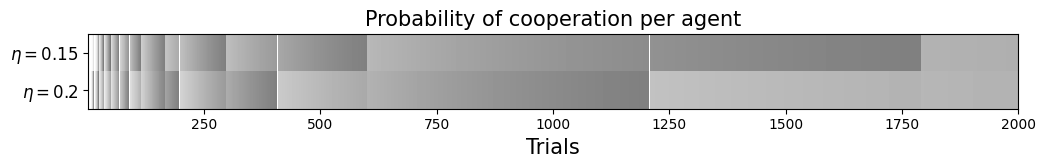

In [21]:
agent_pavlov, agent_2, D = construct(lr_pB = 0.15, lr_pB_2=0.2, factors_to_learn="all")
#training

T = 2000

actions_over_time2, B1_over_time2, qpB_over_time2, q_pi_over_time2, q_s_over_time2, agent2, efe_over_time2 = run_sim_collect_all_data(agent_pavlov, agent_2, observation_1 = [1], observation_2 = [1],D=D,T=T)



fig = plt.figure(figsize=(12,5))
import matplotlib.gridspec as gridspec


sns.lineplot([(-1*e[0]+e[1]) for e in efe_over_time2[:T,:,0]], label = r"$\eta = 0.15$", color = 'purple',alpha=0.7)
sns.lineplot([(-1*e[0]+e[1]) for e in efe_over_time2[:T,:,1]], label = r"$\eta = 0.2$", color = 'mediumseagreen', alpha = 0.7)
plt.legend(fontsize=15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.xlim(1,T)
plt.hlines(0,0,T, color = 'black',zorder = 0)


plt.ylabel('Expected Free Energy Difference',fontsize=15)
plt.xlabel('Trials', fontsize = 15)


fig2, ax2 = plt.subplots(figsize = (12,50))
ax2.grid(color='w', which = 'minor', linestyle='-', linewidth=2)
im = ax2.imshow(q_pi_over_time2[:,1].T,cmap ='gray', aspect = 80, vmin=0, vmax =1, interpolation="None")
ax2.set_xlabel("Trials",fontsize = 15)
#ax2.set_xticks(np.linspace(0,T-1,8).astype(int) ,fontsize = 5)
#ax2.set_xticklabels(np.linspace(-1,T-1,8).astype(int)+1,fontsize = 15)
ax2.set_yticks([0, 1], labels=[r"$\eta = 0.15$", r"$\eta = 0.2$"],fontsize = 12)
ax2.set_xlim(1,T)

plt.title("Probability of cooperation per agent",fontsize = 15)



In [22]:
def learning_rate_sweep(lr_0 = 0.1, lr_1 = 1, num_lrs = 50, T = 500, beta = 1):
    """This function collects the actions over time for Pavlov agents configured given a series of learning rates
    This function is slow!"""
    efes_over_time = []
    actions = []
    qs = []

    for lr in np.linspace(lr_0,lr_1,num_lrs):
        agent_pavlov, agent_2, D = construct(lr_pB = lr, lr_pB_2=lr, factors_to_learn="all", beta = beta)

        actions_over_time, _, _, _, q_s_over_time, _, efe_over_time = run_sim_collect_all_data(agent_pavlov, agent_2, observation_1 = [3], observation_2 = [3],D=D,T=T)

        efes_over_time.append(efe_over_time)
        actions.append(actions_over_time)
        qs.append(q_s_over_time)
    return efes_over_time, actions, qs


In [23]:
def tau_1_by_lr(efes_over_time):
    """This creates data to plot tau1 (the duration of the defection period, before oscillation begins) for deterministic pavlov agents for different learning rates"""
    tau_1_over_lr = []
    for efe in efes_over_time[2:]:
        tau_1_over_lr.append(np.argmax(efe[:,0,0]-efe[:,1,0]>0))
    return tau_1_over_lr


In [24]:
def tau_2_by_lr(actions_over_time_and_lr = None):
    """This creates data to plot tau1 (the duration of the defection period, before oscillation begins) for deterministic pavlov agents for different learning rates"""
    tau_2_over_lr = []
    end = len(actions_over_time_and_lr[0]) 
    if not actions_over_time_and_lr:
        actions_over_time_and_lr = learning_rate_sweep()
    for a in actions_over_time_and_lr:
        current = a[:,0]
        for i, action in enumerate(current):
            if action == 0:
                if current[i+1] == 0 and current[i+2] == 0:
                    tau_2_over_lr.append(i)
                    break
            if i == end:
                tau_2_over_lr.append(-1)
                break
    #masked_array = np.ma.masked_where(tau_2_over_lr == -1, tau_2_over_lr)
    return tau_2_over_lr


In [25]:
def plot_dirichlet_parameters(qpB_over_time, num_steps = 99):
    """ Plots the simulated parameters of the transition dirichlet prior over time"""
    fig = plt.figure(figsize = (8,6))
    qBC_C = [qpB_over_time[i][0,0,0] for i in range(num_steps)]
    qBD_D = [qpB_over_time[i][-1,-1,1] for i in range(num_steps)]
    qBC_D = [qpB_over_time[i][3,0,1] for i in range(num_steps)]
    qBD_C = [qpB_over_time[i][0,3,0] for i in range(num_steps)]
    plt.plot(qBC_C, label = r"$qB^{\mathbf{CC}}(u^{\mathbf{C}})$")
    plt.plot(qBD_D, label = r"$qB^{\mathbf{DD}}(u^{\mathbf{D}})$")
    plt.plot(qBC_D, label = r"$qB^{\mathbf{CC}}(u^{\mathbf{D}})$")
    plt.plot(qBD_C, label = r"$qB^{\mathbf{DD}}(u^{\mathbf{C}})$")
    plt.title("Simulated QB over time")
    plt.xlabel("Number of trials")
    plt.ylabel("Parameters of Dirichlet Prior")
    plt.legend()
    return qBC_C, qBD_D, qBC_D, qBD_C
    

Data from derived analytic equations

In [27]:
def plot_tau1_real_and_approximate(ax, masked_array, approx_tau1s):
    plt.clf()
    fig = plt.figure(figsize = (8,6))
    ax.set_title(r"Approximation of $\tau_1$ by learning rate", fontsize = 18)
    ax.set_xlabel("Learning rate", fontsize = 18)
    ax.set_ylabel(r"$\tau_1$", fontsize = 18)
    ax.set_xticks(range(50)[::5], labels = np.linspace(0,1,50).round(1)[::5])
    sns.lineplot(ax = ax, x = range(len(masked_array)), y = masked_array, label = 'simulated')
    sns.lineplot(ax = ax, x = range(len(masked_array)), y= approx_tau1s, label = 'approximated')
    ax.legend(fontsize = 12)

def plot_tau2_real_and_approximate(ax, masked_array, approx_tau2s):
    plt.clf()
    fig = plt.figure(figsize = (8,6))
    ax.set_title(r"Approximation of $\tau_2$ by learning rate", fontsize = 18)
    ax.set_xlabel("Learning rate", fontsize = 18)
    ax.set_ylabel(r"$\tau_2$", fontsize = 18)
    ax.set_xticks(range(50)[::5], labels = np.linspace(0,1,50).round(1)[::5])
    sns.lineplot(ax = ax, x = range(len(masked_array)), y = masked_array, label = 'simulated')
    sns.lineplot(ax = ax, x = range(len(masked_array)), y = approx_tau2s, label = 'approximated')
    ax.legend(fontsize = 12)

In [28]:
def derived_qBt(t, BD, BC, sD, sC, lr, tau1, tau2):
    """Function for our analytically derived dirichlet priors over time"""
    qB = np.array([BC, BD])
    if t <= tau1:
        qB[1] = BD + lr* np.outer(sD, sD)*(t)
    if t > tau1 and t < tau2:
        if t % 2 == 0:
            qB[1] = BD + lr*np.outer(sD, sD)*tau1 + lr*np.outer(sD, sC) * (((t-tau1)/2) )
            qB[0] = BC + lr*np.outer(sC, sD)*(((t-tau1-1)/2) + 0.5)
        else:
            qB[0] = BC + lr*np.outer(sC, sD)*(((t-tau1)/2 + 0.5))
            qB[1] = BD + lr*np.outer(sD, sD)*tau1 + lr*np.outer(sD, sC)*(((t-tau1-1)/2))
    elif t >= tau2:
        tau2t = tau1 + ((tau2-tau1)/2) + 0.5
        qB[0] = BC + lr* np.outer(sC, sD)*(tau2t-tau1)+ lr* np.outer(sC, sC)*(t-tau2-1) + 0.25
        qB[1] =  BD +  lr* np.outer(sD, sD)*(tau1) + lr* np.outer(sD, sC)*(tau2t-tau1)
    return qB

def approximate_transitions_over_time(lr,T, tau1,tau2):
    derived_qBD_over_time = []
    derived_qBC_over_time = []
    derived_BD_over_time = []
    derived_BC_over_time = []
    for t in range(T):
        qB = derived_qBt(t, BD, BC, sD, sC, lr, tau1, tau2)
        derived_qBC_over_time.append(qB[0])
        
        derived_qBD_over_time.append(qB[1])
        derived_BC_over_time.append(qB[0]/qB[0].sum(axis=0))
        derived_BD_over_time.append(qB[1]/qB[1].sum(axis=0))
    return derived_qBC_over_time, derived_qBD_over_time, derived_BC_over_time, derived_BD_over_time

In [29]:

def derived_tau2(tau1, lr = 0.3, beta =1):
    C_ = pymdp.maths.softmax(beta*np.array([3,1,4,2]))
    return tau1 + (1/lr)*(((np.log(C_[1]) - np.log(C_[2]))/(np.log(C_[3]) - np.log(C_[0])))-1)

def derived_taus(lr = 0.3, beta=1, beta2=1):
    tau1_CONSTS = {1:2.52112676057,2:4.2631578947368425, 3:5.944444444444445}
    const = tau1_CONSTS[beta]
    tau1 = const/lr
    tau2 = derived_tau2(tau1, lr, beta)
    return tau1, tau2

In [30]:
ts1 = []
ts2 = []
ts3 = []

t21 = []
t22 = []
t23 = []
for lr in np.linspace(0.1,1,50):
    t1, t2 = derived_taus(lr,1)
    ts1.append(t1)
    t21.append(t2)
    t1, t2 = derived_taus(lr,2,30)
    ts2.append(t1)
    t22.append(t2)
    t1, t2 = derived_taus(lr,3)
    ts3.append(t1)
    t23.append(t2)

One run for a given learning rate, all data

Simulating and approximating Taus. NOTE: the next cell takes a long time to run!

In [31]:
efes_over_time1, actions_over_time1, q_s_over_time1 = learning_rate_sweep(beta =1)

In [32]:
efes_over_time2, actions_over_time2, q_s_over_time2 = learning_rate_sweep(beta =0.4)

In [38]:
efes_over_time3, actions_over_time3, _ = learning_rate_sweep(beta =0.7)

In [39]:
tau1_by_lr_array = tau_1_by_lr(efes_over_time1)
tau2_by_lr_array = tau_2_by_lr(actions_over_time1)

tau1_by_lr_array2 = tau_1_by_lr(efes_over_time2)
tau2_by_lr_array2 = tau_2_by_lr(actions_over_time2)

tau1_by_lr_array3 = tau_1_by_lr(efes_over_time3)
tau2_by_lr_array3 = tau_2_by_lr(actions_over_time3)

In [40]:
tau2_by_lr_array2 = tau_2_by_lr(actions_over_time2)


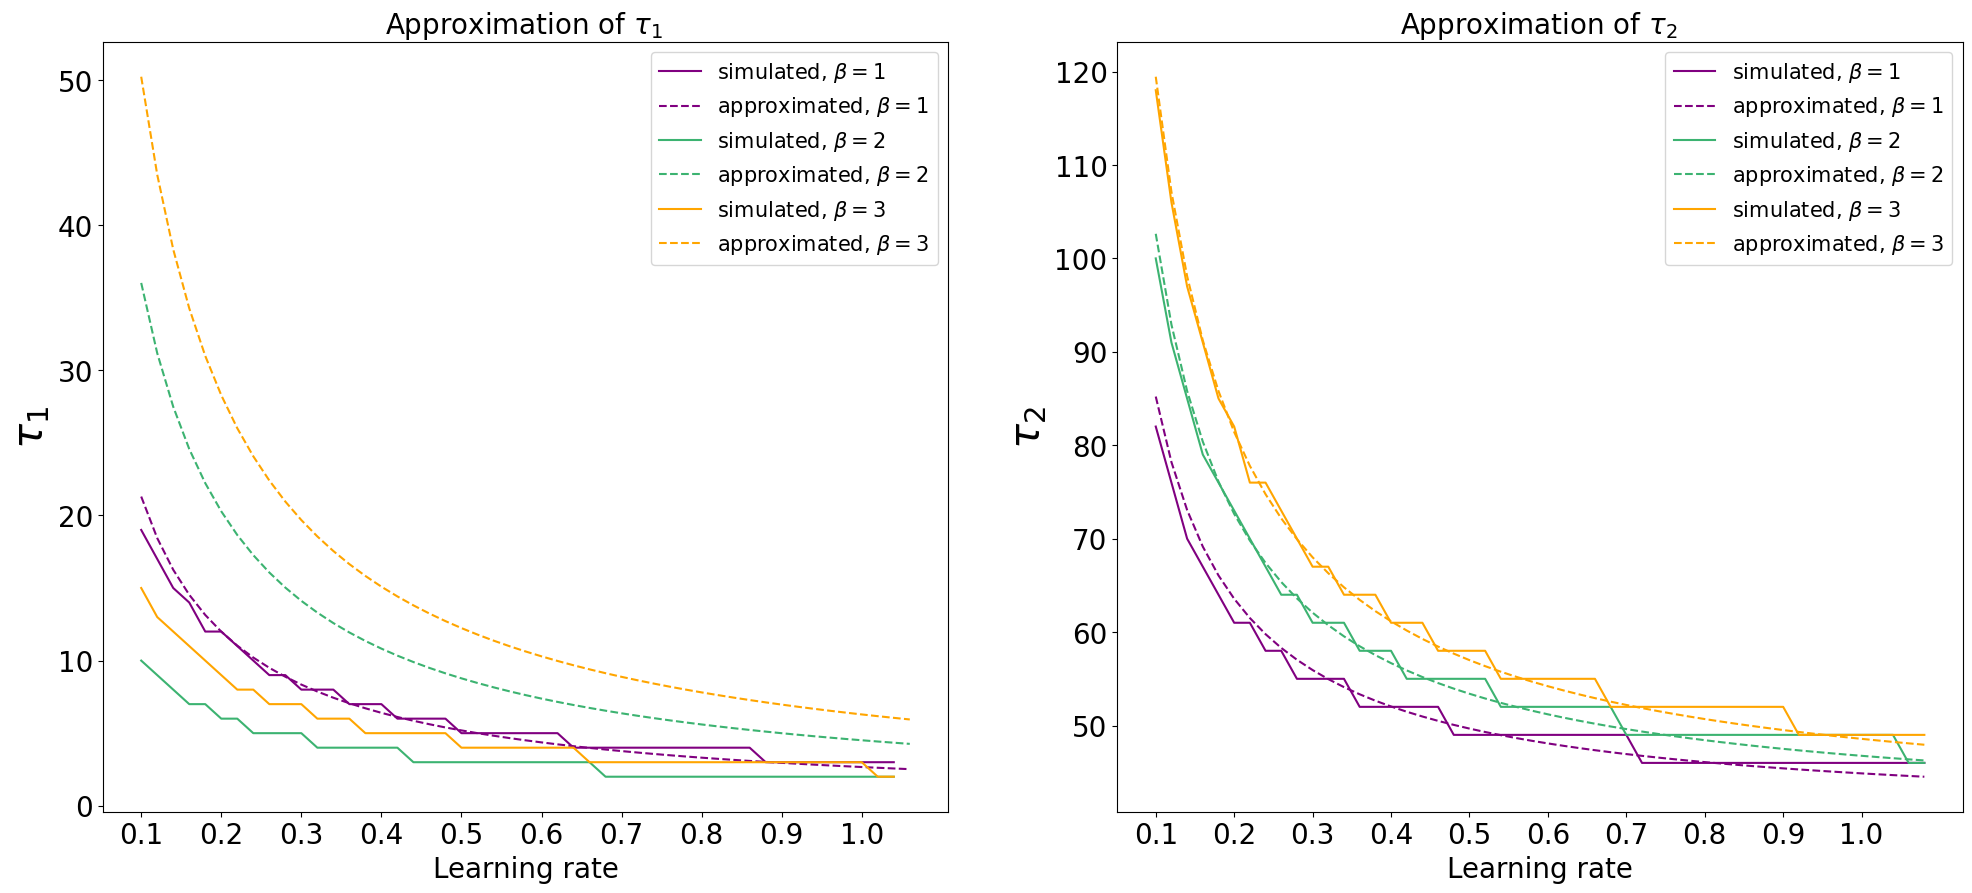

In [41]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2, figsize = (24,10))
#plot_tau1_real_and_approximate(axes[0], tau1_by_lr_array,approx_tau1s)

#plot_tau2_real_and_approximate(axes[1], tau2_by_lr_array[1:],approx_tau2s[1:])

axes[0].set_title(r"Approximation of $\tau_1$ ", fontsize = 20)
axes[0].set_xlabel("Learning rate", fontsize = 20)
axes[0].set_ylabel(r"$\tau_1$", fontsize = 30)
axes[0].set_xticks(range(50)[::5], labels = np.linspace(0.1,1.1,50).round(1)[::5],fontsize=20)
sns.lineplot(ax = axes[0], x = range(len(tau1_by_lr_array)), y = tau1_by_lr_array[:], label = 'simulated, ' + r"$\beta = 1$", color='purple')
axes[0].plot(ts1[1:], linestyle = "--", label = 'approximated, ' + r"$\beta = 1$", color='purple')

sns.lineplot(ax = axes[0], x = range(len(tau1_by_lr_array2)), y = tau1_by_lr_array2, label = 'simulated, ' + r"$\beta = 2$", color='mediumseagreen')
axes[0].plot(ts2[1:], linestyle = "--", label = 'approximated, ' + r"$\beta = 2$", color='mediumseagreen')
sns.lineplot(ax = axes[0], x = range(len(tau1_by_lr_array2)), y = tau1_by_lr_array3, label = 'simulated, ' + r"$\beta = 3$", color='orange')
axes[0].plot(ts3[1:], linestyle = "--", color='orange',label = 'approximated, ' + r"$\beta = 3$")
axes[0].tick_params(axis='both', which='major', labelsize=20)

axes[0].legend(fontsize = 15)

axes[1].set_title(r"Approximation of $\tau_2$ ", fontsize = 20)
axes[1].set_xlabel("Learning rate", fontsize = 20)
axes[1].set_ylabel(r"$\tau_2$", fontsize = 30)
axes[1].tick_params(axis='both', which='major', labelsize=20)

axes[1].set_xticks(range(50)[::5], labels = np.linspace(0.1,1.1,50).round(1)[::5],fontsize=20)
sns.lineplot(ax = axes[1], x = range(len(tau2_by_lr_array2)), y = np.array(tau2_by_lr_array2)+40, label =  'simulated, ' + r"$\beta = 1$", color='purple')
axes[1].plot(np.array(t21) + 40, linestyle = "--", label = 'approximated, ' + r"$\beta = 1$",color='purple')

sns.lineplot(ax = axes[1], x = range(len(tau2_by_lr_array3)), y = np.array(tau2_by_lr_array3)+40, label = 'simulated, ' + r"$\beta = 2$", color='mediumseagreen')
axes[1].plot(np.array(t22) + 40, linestyle = "--", label = 'approximated, ' + r"$\beta = 2$", color='mediumseagreen')

sns.lineplot(ax = axes[1], x = range(len(tau2_by_lr_array)), y = np.array(tau2_by_lr_array)+40, label = 'simulated, ' + r"$\beta = 3$", color='orange')
axes[1].plot(np.array(t23) + 40, linestyle = "--", label = 'approximated, ' + r"$\beta = 3$",color='orange')

axes[1].legend(fontsize = 15)
plt.savefig('approximations')

In [ ]:
import numpy as np
taus_per_beta = np.zeros((10,999))
C = np.array([3,1,4,2])
for b, beta in enumerate(np.linspace(0,5,10)):
    for t, tau in enumerate(range(1,1000)):
        C_ = pymdp.maths.softmax(beta*C)
        taus_per_beta[b,t] = equality_in_terms_of_beta(C_, tau, lr =0.1)

    


/var/folders/6q/6kkn1hmd2wd1528g80csnfw00000gr/T/ipykernel_85733/862477962.py:9: RuntimeWarning: overflow encountered in scalar power
  return (1/(2*(1+lr*t)))*np.log( (1/ (2*(1+lr*t)*C[2])) *(((1+2*lr*t) / (2*(1+lr*t)*C[3])) ** (1+2*lr*t)) )


In [42]:
def rhs(C):
    return 0.5*pymdp.maths.spm_log_single(1/(2*C[0])) + 0.5 * pymdp.maths.spm_log_single(1/(2*C[1]))

def lhs(C,t,lr):
    return (1/(2*(1+lr*t)))*np.log( (1/ (2*(1+lr*t)*C[2])) *(((1+2*lr*t) / (2*(1+lr*t)*C[3])) ** (1+2*lr*t)) )


def equality_in_terms_of_beta(C, t, lr):
    return -1*rhs(C) + lhs(C, t, lr)


In [43]:
import numpy as np

def get_taus_per_beta(lr, T= 10):
    taus_per_beta = np.zeros((T,999))
    roots = []
    C = np.array([3,1,4,2])
    for b, beta in enumerate(np.linspace(1,10,T)):
        C_ = pymdp.maths.softmax(beta*C)
        for t, tau in enumerate(range(1,150)):
            taus_per_beta[b,t] = equality_in_terms_of_beta(C_, tau, lr=lr)
        roots.append(np.argmax(taus_per_beta[b]>0))
    return taus_per_beta, roots

    


/var/folders/6q/6kkn1hmd2wd1528g80csnfw00000gr/T/ipykernel_88832/3530370115.py:5: RuntimeWarning: overflow encountered in scalar power
  return (1/(2*(1+lr*t)))*np.log( (1/ (2*(1+lr*t)*C[2])) *(((1+2*lr*t) / (2*(1+lr*t)*C[3])) ** (1+2*lr*t)) )
/var/folders/6q/6kkn1hmd2wd1528g80csnfw00000gr/T/ipykernel_88832/3530370115.py:5: RuntimeWarning: overflow encountered in scalar power
  return (1/(2*(1+lr*t)))*np.log( (1/ (2*(1+lr*t)*C[2])) *(((1+2*lr*t) / (2*(1+lr*t)*C[3])) ** (1+2*lr*t)) )
/var/folders/6q/6kkn1hmd2wd1528g80csnfw00000gr/T/ipykernel_88832/3530370115.py:5: RuntimeWarning: overflow encountered in scalar power
  return (1/(2*(1+lr*t)))*np.log( (1/ (2*(1+lr*t)*C[2])) *(((1+2*lr*t) / (2*(1+lr*t)*C[3])) ** (1+2*lr*t)) )
/var/folders/6q/6kkn1hmd2wd1528g80csnfw00000gr/T/ipykernel_88832/3530370115.py:5: RuntimeWarning: overflow encountered in scalar power
  return (1/(2*(1+lr*t)))*np.log( (1/ (2*(1+lr*t)*C[2])) *(((1+2*lr*t) / (2*(1+lr*t)*C[3])) ** (1+2*lr*t)) )
/var/folders/6q/6kkn1hmd

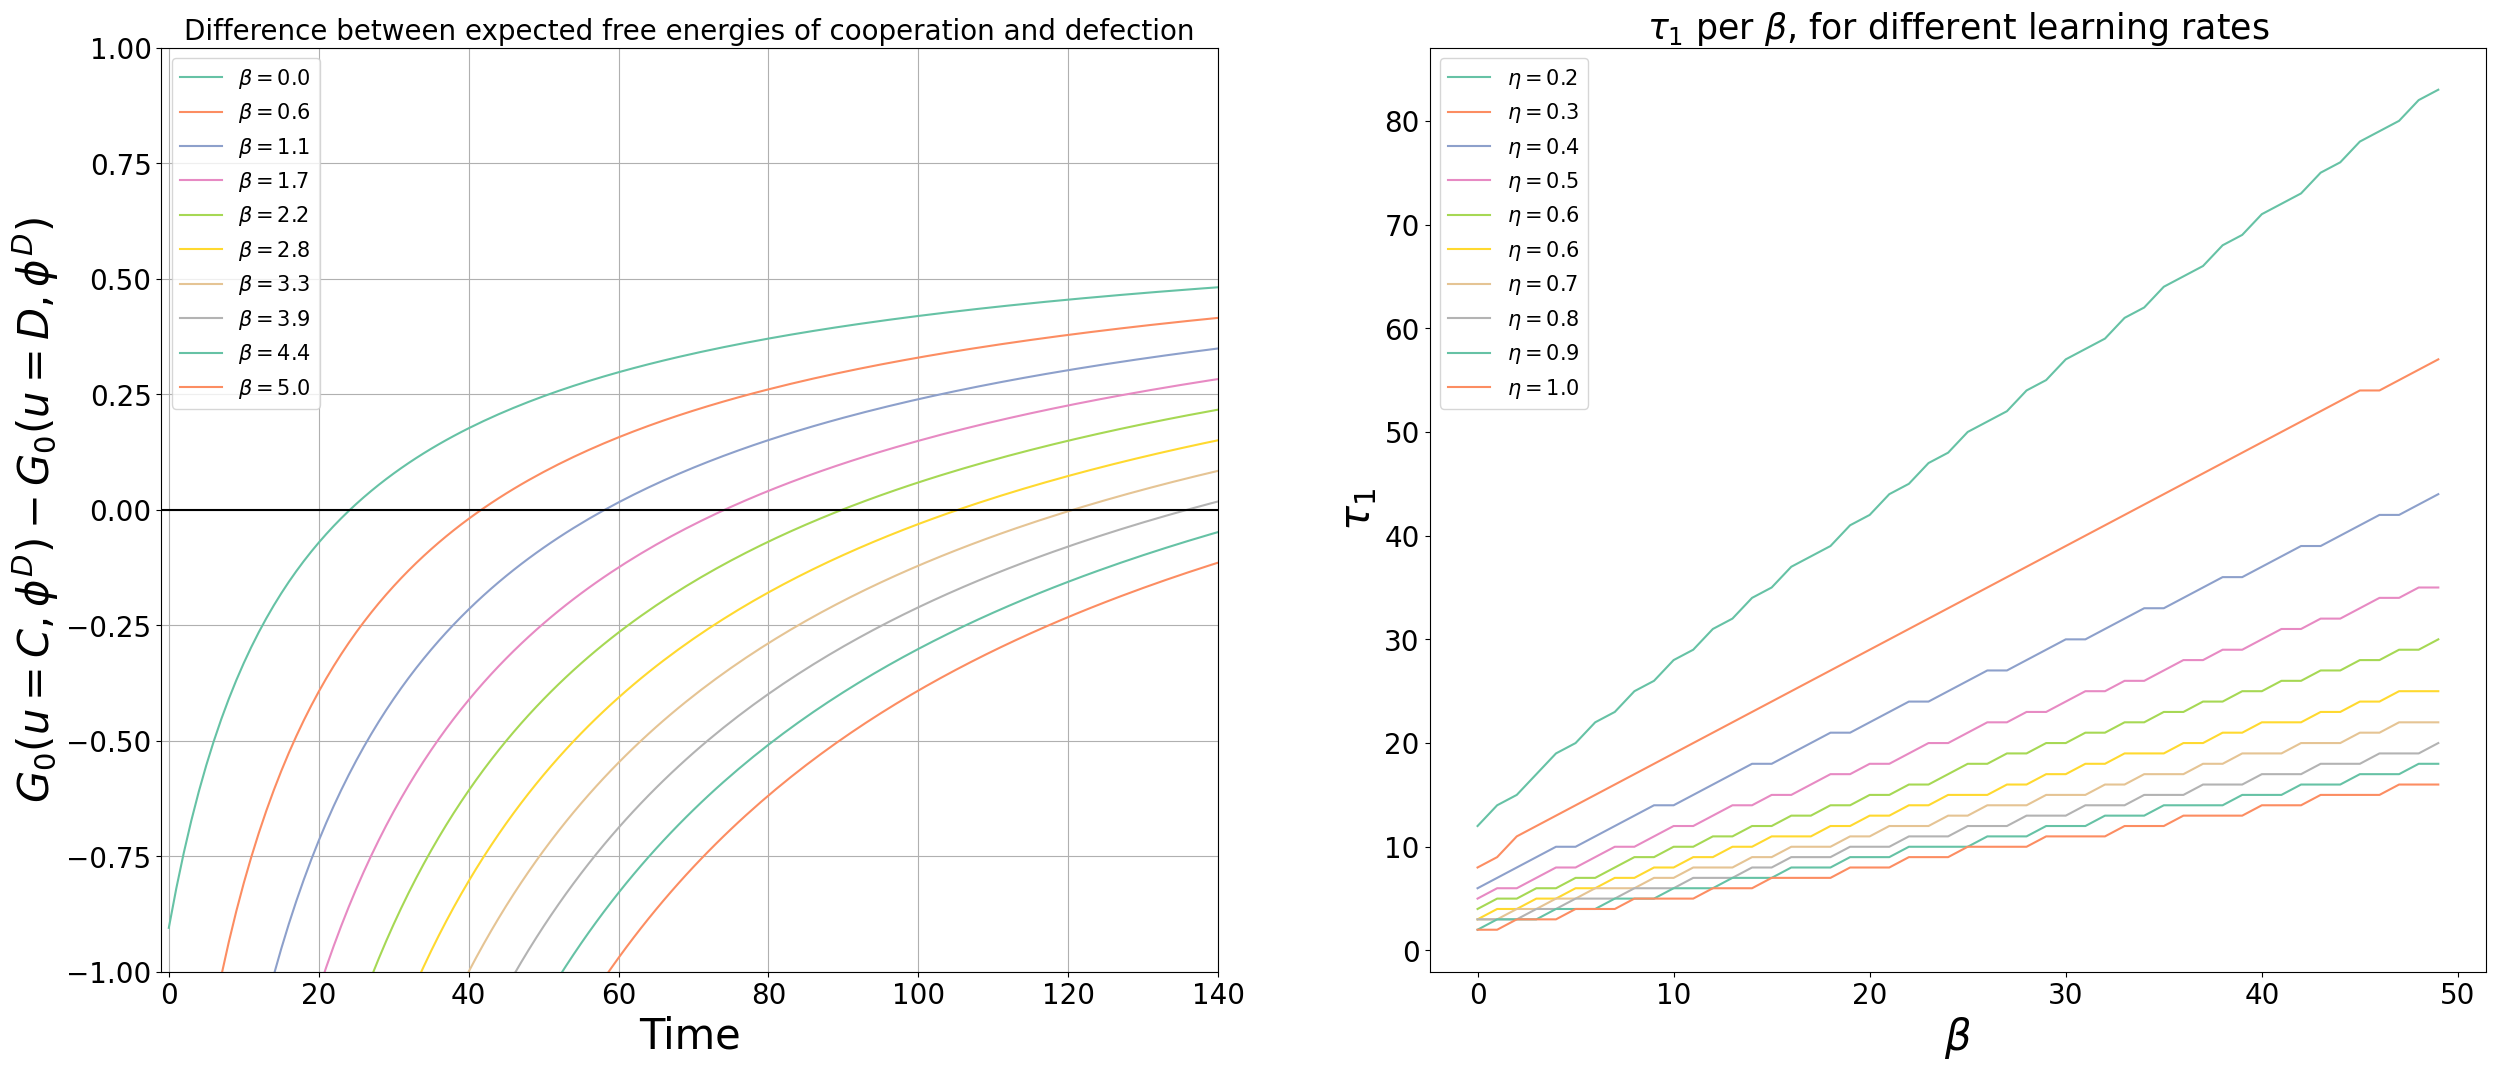

In [45]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2, figsize = (30,12))
#plot_tau1_real_and_approximate(axes[0], tau1_by_lr_array,approx_tau1s)

#plot_tau2_real_and_approximate(axes[1], tau2_by_lr_array[1:],approx_tau2s[1:])

axes[0].set_title("Difference between expected free energies of cooperation and defection", fontsize = 20)
axes[0].set_xlabel("Time", fontsize = 30)
axes[0].set_ylabel(r"$G_0(u = C, \phi^D) - G_0(u = D, \phi^D)$", fontsize = 30)
#axes[0].set_xticks(range(50)[::5], labels = np.linspace(0.1,1.1,50).round(1)[::5],fontsize=20)

taus_per_beta, roots = get_taus_per_beta(0.1)
for b, beta in enumerate(np.linspace(1e-6,5,10)):
   #TODO: index = where taus_per_beta surpasses the negative
   line = taus_per_beta[b]
   sns.lineplot(ax = axes[0], x = range(len(line)), y = line, label = r'$\beta =$' + str(beta.round(1)))
axes[0].axhline(0, color = "black") #x-axis
axes[0].grid()
axes[0].legend(fontsize = 15)
axes[0].set_ylim(-1,1)
axes[0].set_xlim(-1,140)

for lr in np.linspace(0.2,1,10):
    _, roots = get_taus_per_beta(lr,T = 50)
    sns.lineplot(ax = axes[1], x = range(len(roots)), y = roots, label = r'$\eta =$' + str(lr.round(1)))


axes[0].tick_params(axis='both', which='major', labelsize=20)


axes[1].set_title(r"$\tau_1$ per " + r'$\beta$, for different learning rates' , fontsize = 25)
axes[1].set_xlabel( r'$\beta$', fontsize = 30)
axes[1].set_ylabel(r"$\tau_1$", fontsize = 30)
axes[1].tick_params(axis='both', which='major', labelsize=20)
axes[1].legend(fontsize=15)

Simulated parameters of the dirichlet prior over time

Analytically derived parameters of the dirichlet prior over time

In [48]:
import os 
import shutil
import numpy as np
lrs = np.linspace(0.01, 0.6, 100)


main = os.listdir('../stochastic')

subdir = os.listdir('../stochastic/stochastic')

for num in subdir:
    if 'DS' in num or 'git' in num:
        continue
    v = os.listdir(f'../stochastic/stochastic/{num}')
    for x in v:
        shutil.move(f'../stochastic/stochastic/{num}/{x}', f'stochastic/{num}/{x}')

In [51]:
dirs_to_search = []

for lr_1 in range(100):
    lr1 = lrs[lr_1]
    for lr_2 in range(100):
        lr2 = lrs[lr_2]
        if not os.path.exists(f'../stochastic/{lr1}/{lr2}/actions_over_time_all.npy'):

            dirs_to_search.append(f'{lr1}/{lr2}/')

In [52]:
file = open('dirstosearch.txt','w')
for dir in dirs_to_search:
    file.write(dir+"\n")
file.close()

In [53]:
lrs = np.linspace(0.01, 0.6, 100)

time_metric = np.ones((100,100))
accumulated_reward = np.zeros((100,100))

for lr_1 in range(100):
    lr1 = lrs[lr_1]
    for lr_2 in range(100):
        lr2 = lrs[lr_2]
        try:
            r = 0
            current = np.load(f'../stochastic/{lr1}/{lr2}/actions_over_time_all.npy')
            time_metric[lr_1,lr_2] = np.mean(current[:1000]) #- np.std(current[:])
            # time_metric[lr_1,lr_2] = current[-1]
            # for i, action in enumerate(current[:-1]):
                
            #     # if current[i] < 0.85 and current[i+1] < 0.85 and current[i+2] < 0.85:
            #     if np.mean(current[i:,0]) < 0.89 or np.mean(current[i:,1]) < 0.89:
            #         time_metric[lr_1,lr_2] = i 
            #         break
            #     elif i == len(current) - 2:
            #         time_metric[lr_1,lr_2] = -1
        #     r = 0
            for i, action in enumerate(current[0:1000]):
                 r += 0.5*((1-action[0]) * 3 + (1-action[1]) * 3)

            accumulated_reward[lr_1,lr_2] = r
        except Exception as e:
                print(e)
                time_metric[lr_1,lr_2] = time_metric[lr_1,lr_2-1]

[Errno 2] No such file or directory: '../stochastic/0.0397979797979798/0.38545454545454544/actions_over_time_all.npy'
[Errno 2] No such file or directory: '../stochastic/0.10535353535353534/0.4033333333333333/actions_over_time_all.npy'
[Errno 2] No such file or directory: '../stochastic/0.1113131313131313/0.44505050505050503/actions_over_time_all.npy'
[Errno 2] No such file or directory: '../stochastic/0.28414141414141414/0.4569696969696969/actions_over_time_all.npy'


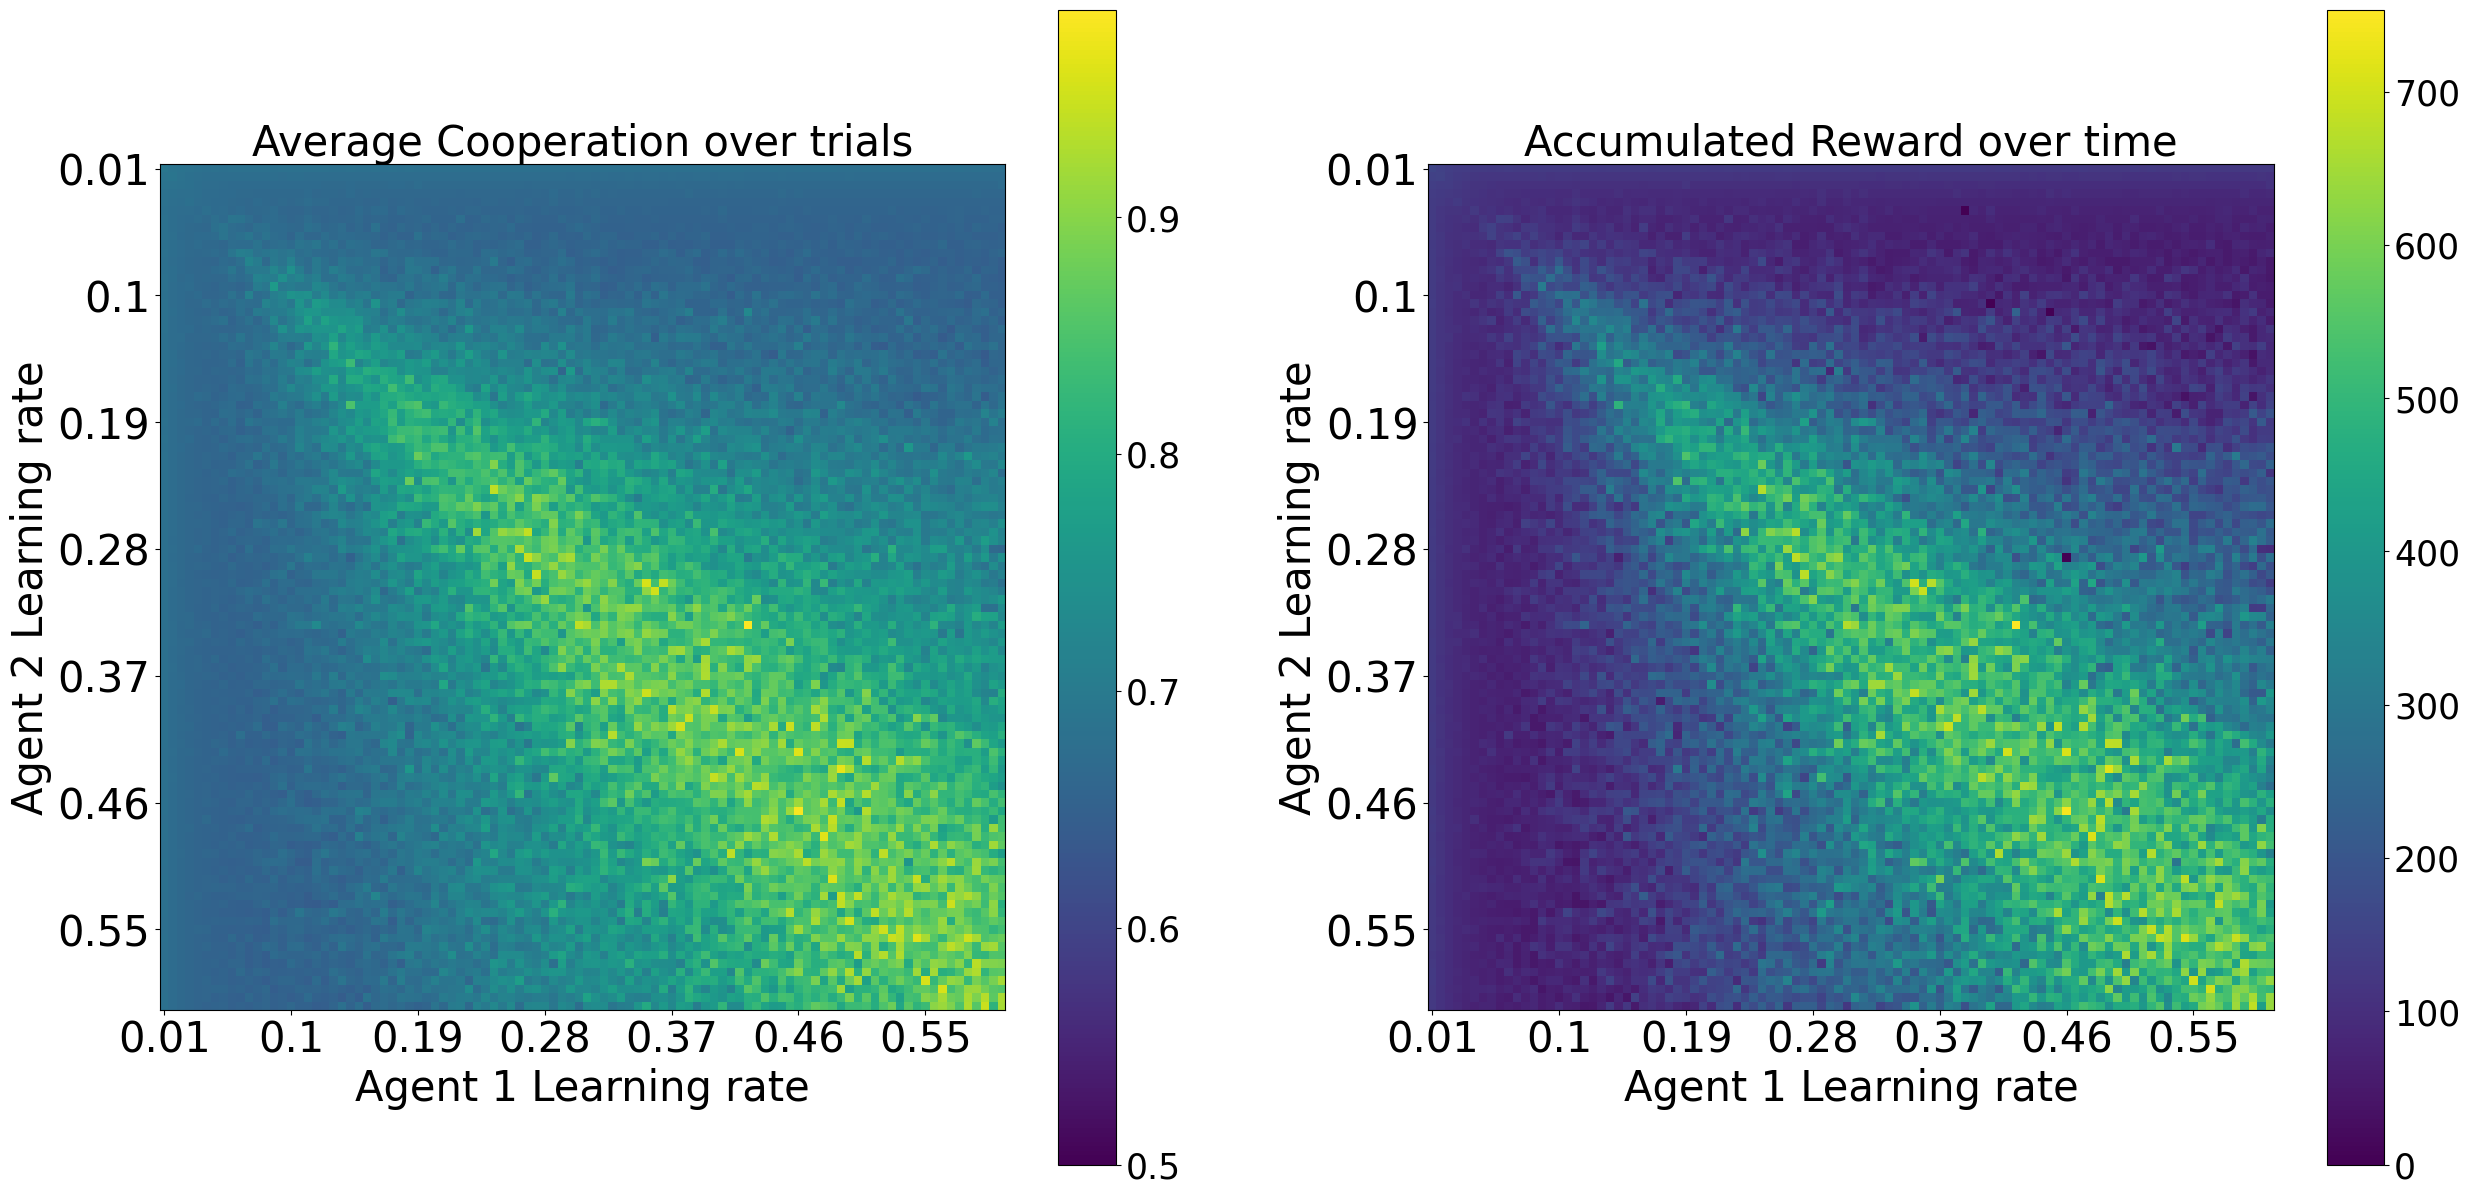

In [54]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,2, figsize=(30,15))

cmap2= plt.get_cmap('viridis') # Can be any colormap that you want after the cm
masked_array = -1*np.ma.masked_where(time_metric == -1, time_metric)
pcm = axs[0].imshow(time_metric,cmap=cmap2, vmin = 0.5)
axs[0].imshow(-1*np.log(time_metric),cmap=cmap2, vmin = -0.1)
axs[0].set_xticks(range(100)[::15], labels= np.linspace(0.01,0.6,100)[::15].round(2),fontsize=30)
axs[0].set_yticks(range(100)[::15], labels= np.linspace(0.01,0.6,100)[::15].round(2),fontsize=30)
axs[0].set_title("Average Cooperation over trials",fontsize=30)
clb = plt.colorbar(pcm, ax=axs[0])
clb.ax.tick_params(labelsize=25) 
# cb = plt.colorbar()
# for t in cb.ax.get_yticklabels():
#      t.set_fontsize(20)
axs[0].set_xlabel("Agent 1 Learning rate", fontsize = 30)
axs[0].set_ylabel("Agent 2 Learning rate", fontsize = 30)

cmap2= plt.get_cmap('viridis') # Can be any colormap that you want after the cm
cmap2.set_bad(color='white')
pcm = axs[1].imshow(accumulated_reward,cmap=cmap2)
axs[1].set_xticks(range(100)[::15], labels= np.linspace(0.01,0.6,100)[::15].round(2),fontsize=30)
axs[1].set_yticks(range(100)[::15], labels= np.linspace(0.01,0.6,100)[::15].round(2),fontsize=30)
axs[1].set_title("Accumulated Reward over time",fontsize=30)
axs[1].set_xlabel("Agent 1 Learning rate", fontsize = 30)
axs[1].set_ylabel("Agent 2 Learning rate", fontsize = 30)
clb = plt.colorbar(pcm, ax=axs[1])
clb.ax.tick_params(labelsize=25) 
plt.savefig("totalreward")

Gonna make matrices for specific strategies and compete against the matrices that emerge from stochasitc